In [2]:
import camb as camb
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import sys
sys.path.append("../")

In [3]:
from pyACC.cosmology.distances import Distances

In [4]:
#Get various background functions and derived parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)
print('Derived parameter dictionary: %s'%results.get_derived_params())

Derived parameter dictionary: {'age': 13.740451258557629, 'zstar': 1090.5874293164534, 'rstar': 144.2080856997203, 'thetastar': 1.0446247484659728, 'DAstar': 13.804774002481686, 'zdrag': 1059.231531977, 'rdrag': 146.98718126684048, 'kd': 0.140671474238239, 'thetad': 0.16177616373192963, 'zeq': 3441.8515054149993, 'keq': 0.010503792217322724, 'thetaeq': 0.8079811528320672, 'thetarseq': 0.4469751339083145}


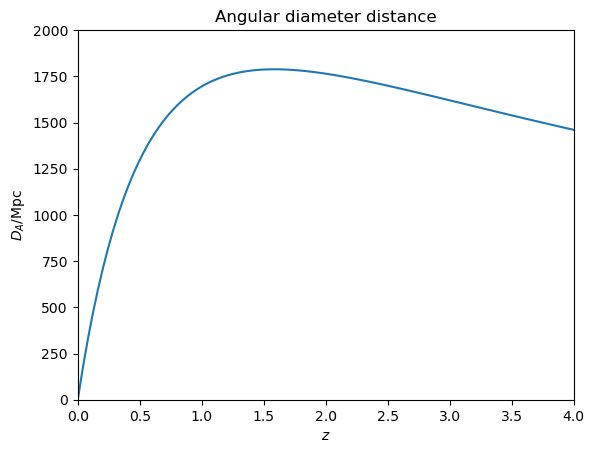

In [7]:
z_values = np.linspace(0,4,100)
DA = results.angular_diameter_distance(z_values)
plt.plot(z_values, DA)
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.title('Angular diameter distance')
plt.ylim([0,2000])
plt.xlim([0,4]);

In [8]:
def hfunc_from_cosmology(z, cosmology):
    return cosmology.hubble_parameter(z)

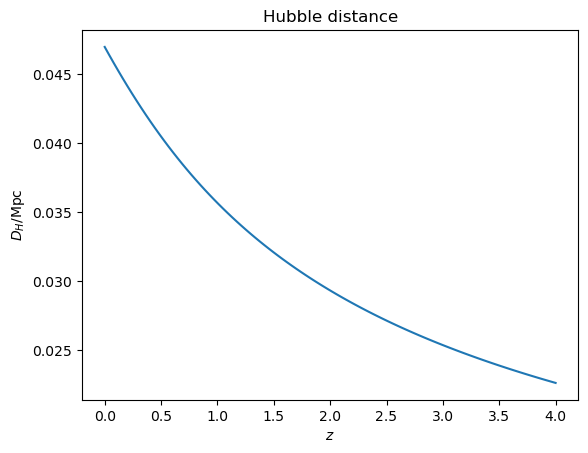

In [9]:
#z_values = np.linspace(0, 100, 1000)
Distanza = Distances(lambda z: hfunc_from_cosmology(z, results))
distanze_hubble= np.array([Distanza.rhubble_distance(z) for z in z_values])

#grafico rhubble
plt.plot(z_values, distanze_hubble)
plt.xlabel('$z$')
plt.ylabel(r'$D_H /\rm{Mpc}$')
plt.title('Hubble distance')
plt.show()


In [10]:
def theta_H_matter(z):
    # Formula derivata: theta_H(z) = (1+z)^(1/2) / [1 - (1+z)^(-1/2)]
    return (1+z)**0.5 / (1 - (1+z)**(-0.5))

# Radiazione dominata:
def theta_H_radiation(z):
    # Formula derivata: theta_H(z) = (1+z) / z
    # Attenzione: per z molto piccoli questa formula diverge.
    return (1+z) / z

# 3. Costruiamo i vettori di redshift per il plot

theta_matter = np.array([theta_H_matter(z) for z in z_values])
theta_radiation = np.array([theta_H_radiation(z) for z in z_values])


/tmp/ipykernel_2874/4200842830.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (1+z)**0.5 / (1 - (1+z)**(-0.5))
/tmp/ipykernel_2874/4200842830.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  return (1+z) / z


/tmp/ipykernel_2874/1285363258.py:1: RuntimeWarning: divide by zero encountered in divide
  theta = distanze_hubble*299792.458/DA


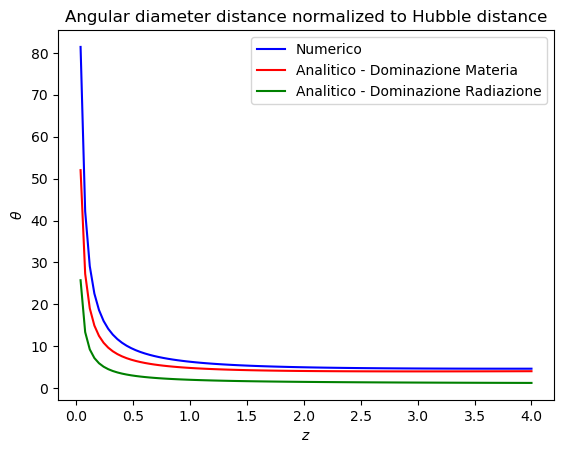

In [11]:
theta = distanze_hubble*299792.458/DA
plt.plot(z_values, theta, label='Numerico', color='blue')
plt.plot(z_values, theta_matter, label='Analitico - Dominazione Materia', color='red')
plt.plot(z_values, theta_radiation, label='Analitico - Dominazione Radiazione', color='green')
plt.xlabel('$z$')
plt.ylabel(r'$\theta$')
plt.title('Angular diameter distance normalized to Hubble distance')
plt.legend()
plt.show()

/tmp/ipykernel_2874/1782042944.py:4: RuntimeWarning: invalid value encountered in multiply
  return (theta**2) * DA**2


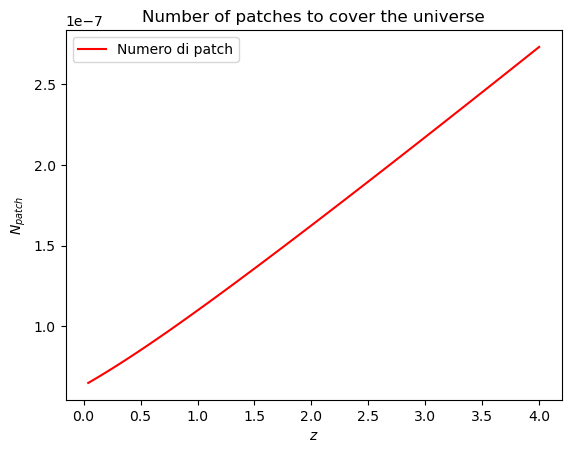

In [12]:
#area singolo patch 
def area_single_patch(theta, DA):
    # Formula per l'area di un patch angolare
    return (theta**2) * DA**2

#numero di patch necessari per coprire l'universo
def number_of_patches(theta, DA):
    # Formula per il numero di patch
    return (4 * np.pi) / area_single_patch(theta, DA)

#plt.plot(z_values, area_single_patch(theta, DA), label='Area singolo patch', color='blue')
plt.plot(z_values, number_of_patches(theta, DA), label='Numero di patch', color='red')
plt.xlabel('$z$')
plt.ylabel(r'$N_{patch}$')
plt.title('Number of patches to cover the universe')
plt.legend()
plt.show()
